# Tara analysis data prep

In [1]:
! pwd

/home/jovyan/tara


In [2]:
import pandas as pd
import geopandas as gpd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import cartopy.crs as crs
from datetime import datetime


from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter, LatitudeLocator, LongitudeLocator)

# we need to interpolate all the seabass files to the same wavelengths

But we only need to do this once then we can save these out as .csv files and pull them in as needed

### define a base wavelength set

In [3]:
# the wavelengths we'll interpolate TO
base_wl_ap = ['ap408.5', 'ap411.9', 'ap415.3', 'ap419.2','ap423.5', 'ap427.6', 'ap431.5', 'ap435.7', 'ap439.3', 'ap443.5','ap447.9', 'ap452.7', 'ap457.1', 'ap461', 'ap465.4', 'ap469.8','ap474.3', 'ap479', 'ap483.8', 'ap488.1', 'ap492.3', 'ap496.5','ap500.8', 'ap505.4', 'ap509.9', 'ap514.7', 'ap519', 'ap523.7', 'ap528','ap532', 'ap536.1', 'ap540.4', 'ap544.5', 'ap549.2', 'ap553.3','ap557.5', 'ap561.6', 'ap565.9', 'ap570', 'ap573.7', 'ap577.5','ap582.5', 'ap586.6', 'ap590.7', 'ap594.9', 'ap599.3', 'ap603.6','ap608', 'ap612.3', 'ap616.9', 'ap621.2', 'ap625.5', 'ap629.7','ap633.9', 'ap638.2', 'ap642.3', 'ap646.6', 'ap650.9', 'ap655.5','ap659.8', 'ap664.1', 'ap668.5', 'ap672.6', 'ap676.8', 'ap680.9','ap685', 'ap689', 'ap692.9', 'ap696.6', 'ap700.5', 'ap704.2', 'ap707.9','ap712', 'ap715.5', 'ap719.3', 'ap723', 'ap726.7', 'ap730']

ap_wl = [float(i[2:]) for i in base_wl_ap]

base_wl_ap_sd = ['ap'+str(i)+'_sd' for i in ap_wl]

base_wl_cp = ['cp'+str(i) for i in ap_wl]
base_wl_cp_sd = ['cp'+str(i)+'_sd' for i in ap_wl]

define the start and stop of each ap and cp and ap_sd and cp_sd

These were different for each ACS so needed to be check manually

TODO I need to double check these numbers to ensure they index correctly

In [4]:
# the first section of each is TaraPacific and the second is TaraMicrobiome
ap_col_start = [6,6,6,6,6,6,6,6] + [7]*14
ap_col_stop = [90,90,92,84,84,89,87,89] + [87]*14

cp_col_start = [174,174,178,162,162,172,169,172] + [87]*14
cp_col_stop = [258,258,264,240,240,255,249,255] + [167]*14

This goes through and interpolates the ap, cp and associated standard deviations into a new common set of wavelengths and then writes it out

In [5]:
seabass_files = [    'data/TaraPacific_InLine_ACS007_20160528_20160629_Particulate_v20220823.sb',
                     'data/TaraPacific_InLine_ACS007_20161005_20170218_Particulate_v20220823.sb',
                     'data/TaraPacific_InLine_ACS057_20160630_20160714_Particulate_v20220823.sb',
                     'data/TaraPacific_InLine_ACS091_20170430_20170903_Particulate_v20220823.sb',
                     'data/TaraPacific_InLine_ACS091_20180530_20180817_Particulate_v20220823.sb',
                     'data/TaraPacific_InLine_ACS111_20171213_20180530_Particulate_v20220823.sb',
                     'data/TaraPacific_InLine_ACS279_20170903_20171213_Particulate_v20220823.sb',
                     'data/TaraPacific_InLine_ACS279_20180817_20180919_Particulate_v20220823.sb'
                ]+ \
                [
                        "data/TaraMicrobiome_InLine_ACS57_20201224_20210205_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20210217_20210317_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20210320_20210407_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20210411_20210420_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20210426_20210509_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20210818_20210918_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20210924_20211009_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20211017_20211103_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20211111_20211125_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20211205_20211227_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20220101_20220227_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20220305_20220423_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20220501_20220601_Particulate_v20240111.sb",
                        "data/TaraMicrobiome_InLine_ACS57_20220606_20220709_Particulate_v20240111.sb" 
                ]

seabass_files

['data/TaraPacific_InLine_ACS007_20160528_20160629_Particulate_v20220823.sb',
 'data/TaraPacific_InLine_ACS007_20161005_20170218_Particulate_v20220823.sb',
 'data/TaraPacific_InLine_ACS057_20160630_20160714_Particulate_v20220823.sb',
 'data/TaraPacific_InLine_ACS091_20170430_20170903_Particulate_v20220823.sb',
 'data/TaraPacific_InLine_ACS091_20180530_20180817_Particulate_v20220823.sb',
 'data/TaraPacific_InLine_ACS111_20171213_20180530_Particulate_v20220823.sb',
 'data/TaraPacific_InLine_ACS279_20170903_20171213_Particulate_v20220823.sb',
 'data/TaraPacific_InLine_ACS279_20180817_20180919_Particulate_v20220823.sb',
 'data/TaraMicrobiome_InLine_ACS57_20201224_20210205_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210217_20210317_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210320_20210407_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210411_20210420_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210426_20210509_Par

In [6]:
import warnings
warnings.filterwarnings('ignore')

This isn't very performant but only needs to be run once so shouldn't be a major bottleneck.

['data/TaraPacific_InLine_ACS279_20180817_20180919_Particulate_v20220823.sb',
 'data/TaraMicrobiome_InLine_ACS57_20201224_20210205_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210217_20210317_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210320_20210407_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210411_20210420_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210426_20210509_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210818_20210918_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20210924_20211009_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20211017_20211103_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20211111_20211125_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20211205_20211227_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_20220101_20220227_Particulate_v20240111.sb',
 'data/TaraMicrobiome_InLine_ACS57_2022030

In [15]:
skip = list(range(0,24))+[25,26,27] # we just skip some of the metadata that we don't want in the dataframes

for idx, sb_fn in enumerate(seabass_files):
    print(sb_fn)
    if idx < 8:
        continue

    df_spec = pd.read_csv(sb_fn, skiprows = skip)
    
    if idx >= 8:
        df_spec.rename(columns={'/fields=date': 'date'}, inplace=True)

    date_time_strs = df_spec['date'].astype(str) + ' ' + df_spec['time'].astype(str)

    df_spec['datetime'] = [datetime.strptime(x, '%Y%m%d %H:%M:%S') for x in date_time_strs]

    df_spec['utc_dt'] = df_spec['datetime']
    df_spec  = df_spec.set_index('utc_dt')

    # convert all -9999s across all columns to nans
    for c in df_spec.columns:
        df_spec.loc[df_spec[c] == -9999, c] = np.nan
        
    ### AP ###

    # the wavelengths we'll interpolate FROM and the columns we'll drop
    ap_cols = df_spec.columns[ap_col_start[idx]:ap_col_stop[idx]]
    wls = [float(j[2:]) for j in ap_cols]
    
    ap_spec = []
    for i in range(len(df_spec)):
        ap_spec.append(np.interp(ap_wl,wls,df_spec.iloc[i,ap_col_start[idx]:ap_col_stop[idx]].astype(float).values))
    
    ### AP SD ###

    # need this logic switch because the column order switches on microbiome
    if idx < 8: 
        ap_sd_cols = df_spec.columns[ap_col_stop[idx]:ap_col_stop[idx]+(ap_col_stop[idx]-ap_col_start[idx])]

        ap_sd_spec = []
        for i in range(len(df_spec)):
            ap_sd_spec.append(np.interp(ap_wl,wls,df_spec.iloc[i,ap_col_stop[idx]:ap_col_stop[idx]+(ap_col_stop[idx]-ap_col_start[idx])].astype(float).values))    
    else:
        ap_sd_cols = df_spec.columns[cp_col_stop[idx]:cp_col_stop[idx]+(ap_col_stop[idx]-ap_col_start[idx])]

        ap_sd_spec = []
        for i in range(len(df_spec)):
            ap_sd_spec.append(np.interp(ap_wl,wls,df_spec.iloc[i,cp_col_stop[idx]:cp_col_stop[idx]+(ap_col_stop[idx]-ap_col_start[idx])].astype(float).values))    
            
    print('Done with ap and ap_sd')
    
    ## CP ###
    
    # the wavelengths we'll interpolate FROM and the columns we'll drop
    # NOTE that these cp wavelengths are slightly different
    cp_cols = df_spec.columns[cp_col_start[idx]:cp_col_stop[idx]]
    wls = [float(j[2:]) for j in cp_cols]

    cp_spec = []
    for i in range(len(df_spec)):
        cp_spec.append(np.interp(ap_wl,wls,df_spec.iloc[i,cp_col_start[idx]:cp_col_stop[idx]].astype(float).values))

    
    ### CP SD ###
    if idx < 8:
        cp_sd_cols = df_spec.columns[cp_col_stop[idx]:cp_col_stop[idx]+(cp_col_stop[idx]-cp_col_start[idx])]

        cp_sd_spec = []
        for i in range(len(df_spec)):
            cp_sd_spec.append(np.interp(ap_wl,wls,df_spec.iloc[i,cp_col_stop[idx]:cp_col_stop[idx]+(cp_col_stop[idx]-cp_col_start[idx])].astype(float).values))

    else:
        cp_sd_cols = df_spec.columns[cp_col_stop[idx]+80:cp_col_stop[idx]+160]

        cp_sd_spec = []
        for i in range(len(df_spec)):
            cp_sd_spec.append(np.interp(ap_wl,wls,df_spec.iloc[i,cp_col_stop[idx]+80:cp_col_stop[idx]+160].astype(float).values))
            
    print('Done with cp and cp_sd')

            
    # first we drop the old columns
    df_spec = df_spec.drop(columns=ap_cols)
    df_spec = df_spec.drop(columns=ap_sd_cols)
    
    df_spec = df_spec.drop(columns=cp_cols)
    df_spec = df_spec.drop(columns=cp_sd_cols)
    
    # now we add these new interpolated wavelengths to the dataframe
    df_spec[base_wl_ap] = ap_spec
    df_spec[base_wl_ap_sd] = ap_sd_spec
    
    df_spec[base_wl_cp] = cp_spec
    df_spec[base_wl_cp_sd] = cp_sd_spec
    print('Done with cp and cp_sd')

    df_spec.to_csv(sb_fn[:-3]+'_interpolated.csv')
    
    print('file written')

data/TaraPacific_InLine_ACS007_20160528_20160629_Particulate_v20220823.sb
data/TaraPacific_InLine_ACS007_20161005_20170218_Particulate_v20220823.sb
data/TaraPacific_InLine_ACS057_20160630_20160714_Particulate_v20220823.sb
data/TaraPacific_InLine_ACS091_20170430_20170903_Particulate_v20220823.sb
data/TaraPacific_InLine_ACS091_20180530_20180817_Particulate_v20220823.sb
data/TaraPacific_InLine_ACS111_20171213_20180530_Particulate_v20220823.sb
data/TaraPacific_InLine_ACS279_20170903_20171213_Particulate_v20220823.sb
data/TaraPacific_InLine_ACS279_20180817_20180919_Particulate_v20220823.sb
data/TaraMicrobiome_InLine_ACS57_20201224_20210205_Particulate_v20240111.sb
Done with ap and ap_sd
Done with cp and cp_sd
Done with cp and cp_sd
file written
data/TaraMicrobiome_InLine_ACS57_20210217_20210317_Particulate_v20240111.sb
Done with ap and ap_sd
Done with cp and cp_sd
Done with cp and cp_sd
file written
data/TaraMicrobiome_InLine_ACS57_20210320_20210407_Particulate_v20240111.sb
Done with ap and

## Now merge this with the product dataframe

We will merge based on datetime so we can merge as much as we want

In [16]:
# ! ls data

In [5]:
# this is commented out but could be used to only get subsets of the data
# n_rows = 432737
# skip = np.arange(n_rows)
# skip = np.delete(skip, np.arange(0, n_rows, 5))
df = pd.read_csv('data/TaraPacific_InLine_ACS_prod_full.csv')

# df2 = pd.read_csv('data/TaraMicrobiome_InLine_Merged_v20220930.csv') # this merged product has some major issues
df2 = pd.read_csv('data/TaraMicrobiome_InLine_ACS_20201226_20220917_Products_full_v20240111.csv')

In [6]:
df = df[['dt', 'lat', 'lon', 't', 's', 'ad_model400', 'agaus406', 'agaus434',
       'agaus453', 'agaus470', 'agaus492', 'agaus523', 'agaus550', 'agaus584',
       'agaus617', 'agaus638', 'agaus660', 'agaus675', 'agaus-mae', 'POC_cp',
       'ap676_lh', 'Chl_lineheight', 'cp_gamma', 'Halh', 'chl_Halh', 'HH_G50',
       'HH_mphi', 'flag_bit', 'ap_n', 'cp_n']]

In [7]:
df.columns

Index(['dt', 'lat', 'lon', 't', 's', 'ad_model400', 'agaus406', 'agaus434',
       'agaus453', 'agaus470', 'agaus492', 'agaus523', 'agaus550', 'agaus584',
       'agaus617', 'agaus638', 'agaus660', 'agaus675', 'agaus-mae', 'POC_cp',
       'ap676_lh', 'Chl_lineheight', 'cp_gamma', 'Halh', 'chl_Halh', 'HH_G50',
       'HH_mphi', 'flag_bit', 'ap_n', 'cp_n'],
      dtype='object')

In [8]:
df2 = df2.rename(columns={'sst': 't', 'sss': 's'})

In [9]:
df2.columns

Index(['dt', 'lat', 'lon', 't', 's', 'fdom', 'ap_n', 'cp_n', 'ad_model400',
       'agaus406', 'agaus434', 'agaus453', 'agaus470', 'agaus492', 'agaus523',
       'agaus550', 'agaus584', 'agaus617', 'agaus638', 'agaus660', 'agaus675',
       'agaus-mae', 'POC_cp', 'ap676_lh', 'Chl_lineheight', 'cp_gamma', 'Halh',
       'chl_Halh', 'HH_G50', 'HH_mphi', 'flag_bit'],
      dtype='object')

In [10]:
df = df.append(df2, ignore_index=True)

/tmp/ipykernel_2950/445450659.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)


In [11]:
del df2

In [12]:
df['datetime'] = pd.to_datetime(df.dt)
df['utc_dt'] = df['datetime']
df  = df.set_index('utc_dt')

In [13]:
df.columns

Index(['dt', 'lat', 'lon', 't', 's', 'ad_model400', 'agaus406', 'agaus434',
       'agaus453', 'agaus470', 'agaus492', 'agaus523', 'agaus550', 'agaus584',
       'agaus617', 'agaus638', 'agaus660', 'agaus675', 'agaus-mae', 'POC_cp',
       'ap676_lh', 'Chl_lineheight', 'cp_gamma', 'Halh', 'chl_Halh', 'HH_G50',
       'HH_mphi', 'flag_bit', 'ap_n', 'cp_n', 'fdom', 'datetime'],
      dtype='object')

In [14]:
columns_to_merge = ['datetime','acs_num']+base_wl_ap+base_wl_ap_sd+base_wl_cp+base_wl_cp_sd

In [15]:
seabass_files = [
    'data/TaraPacific_InLine_ACS007_20160528_20160629_Particulate_v20220823_interpolated.csv',
    'data/TaraPacific_InLine_ACS007_20161005_20170218_Particulate_v20220823_interpolated.csv',
    'data/TaraPacific_InLine_ACS057_20160630_20160714_Particulate_v20220823_interpolated.csv',
    'data/TaraPacific_InLine_ACS091_20170430_20170903_Particulate_v20220823_interpolated.csv',
    'data/TaraPacific_InLine_ACS091_20180530_20180817_Particulate_v20220823_interpolated.csv',
    'data/TaraPacific_InLine_ACS111_20171213_20180530_Particulate_v20220823_interpolated.csv',
    'data/TaraPacific_InLine_ACS279_20170903_20171213_Particulate_v20220823_interpolated.csv',
    'data/TaraPacific_InLine_ACS279_20180817_20180919_Particulate_v20220823_interpolated.csv']

microbiome_seabass_files = [
    "data/TaraMicrobiome_InLine_ACS57_20201224_20210205_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20210217_20210317_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20210320_20210407_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20210411_20210420_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20210426_20210509_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20210818_20210918_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20210924_20211009_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20211017_20211103_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20211111_20211125_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20211205_20211227_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20220101_20220227_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20220305_20220423_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20220501_20220601_Particulate_v20240111_interpolated.csv",
    "data/TaraMicrobiome_InLine_ACS57_20220606_20220709_Particulate_v20240111_interpolated.csv" 
    ]

seabass_files = seabass_files + microbiome_seabass_files

acs_num = ['007','007','057','091','091','111','279','279']

microbiome_acs_num = [57]*14

acs_num = acs_num + microbiome_acs_num

full_spec_dfs = []

for idx, sb_fn in enumerate(seabass_files):
    df_spec = pd.read_csv(sb_fn)
    
    df_spec['datetime'] = pd.to_datetime(df_spec.datetime)
    df_spec  = df_spec.set_index('utc_dt')
    
    df_spec['acs_num'] = acs_num[idx]

    full_spec_dfs.append(df_spec)
    
df_merged = pd.concat(full_spec_dfs, ignore_index=False, sort=True)

### Now we actually merge them

In [16]:
df = pd.merge_asof(df, df_merged[columns_to_merge].sort_index(), on='datetime', direction='nearest',tolerance=pd.Timedelta('31Min'))

### Add in bb3 data now

In [17]:
df_bb3 = pd.read_csv('data/TaraPacific_InLine_BB3_particulate.csv')

In [18]:
df_bb3

,dt,lat,lon,sst,sss,VSF124_1,VSF124_2,VSF124_3,bbp_1,bbp_2,...,VSF124_sd_1,VSF124_sd_2,VSF124_sd_3,bincount,poc_1,poc_2,poc_3,cphyto_1,cphyto_2,cphyto_3
0,14-Nov-2016 22:06:00,-18.892010,-159.829800,27.3845,35.6251,0.000470,NaN,NaN,0.003178,NaN,...,0.000095,NaN,NaN,24.0,77.992534,NaN,NaN,39.131845,NaN,NaN
1,14-Nov-2016 22:07:00,-18.892050,-159.829800,27.3844,35.6252,0.000405,NaN,0.000134,0.002738,NaN,...,0.000086,NaN,0.000010,49.0,67.573691,NaN,30.316820,33.794241,NaN,14.707439
2,14-Nov-2016 22:08:00,-18.892000,-159.829800,27.3880,35.6253,0.000358,NaN,NaN,0.002417,NaN,...,0.000088,NaN,NaN,47.0,59.983727,NaN,NaN,29.905881,NaN,NaN
3,14-Nov-2016 22:09:00,-18.892000,-159.829800,27.3897,35.6258,0.000338,NaN,NaN,0.002286,NaN,...,0.000077,NaN,NaN,48.0,56.867488,NaN,NaN,28.309422,NaN,NaN
4,14-Nov-2016 22:10:00,-18.892058,-159.829817,27.3880,35.6259,0.000353,NaN,NaN,0.002385,NaN,...,0.000057,NaN,NaN,51.0,59.210925,NaN,NaN,29.509972,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350953,26-Oct-2018 11:58:00,47.777070,-4.743720,14.9972,35.3968,0.000642,0.000553,0.000232,0.004342,0.003738,...,0.000039,0.000026,0.000014,52.0,105.542623,100.226772,50.571499,53.245835,50.522509,25.083969
350954,26-Oct-2018 11:59:00,47.775690,-4.740020,15.0221,35.4036,0.000678,0.000548,0.000206,0.004585,0.003703,...,0.000040,0.000025,0.000011,52.0,111.303354,99.306545,45.216774,56.197074,50.051074,22.340728
350955,26-Oct-2018 12:00:00,47.774330,-4.736480,15.0354,35.4110,0.000659,0.000543,0.000227,0.004457,0.003671,...,0.000041,0.000027,0.000015,52.0,108.270961,98.482274,49.453042,54.643571,49.628798,24.510980
350956,26-Oct-2018 12:01:00,47.773120,-4.733370,15.0249,35.4108,0.000667,0.000537,0.000215,0.004509,0.003629,...,0.000039,0.000024,0.000013,52.0,109.503890,97.394123,47.139709,55.275203,49.071335,23.325853


now adding microbiome bb3 data

In [19]:
df_bb3_micro = pd.read_csv('data/TaraMicrobiome_InLine_BB31502_20201226_20210509_Product_v20240111.csv')

In [20]:
df_bb3_micro

,dt,lat,lon,sst,sss,VSF124_1,VSF124_2,VSF124_3,bbp_1,bbp_2,...,VSF124_sd_2,VSF124_sd_3,bincount,gamma_bbp,poc_1,poc_2,poc_3,cphyto_bbp_1,cphyto_bbp_2,cphyto_bbp_3
0,26-Dec-2020 20:15:00,41.589327,-11.303156,14.792467,35.672333,0.000181,0.000182,0.000182,0.001246,0.001251,...,0.000146,0.000339,46,-0.022710,32.257698,35.385558,41.026691,15.701756,17.304168,20.194136
1,26-Dec-2020 20:16:00,41.587521,-11.304213,14.803383,35.673050,0.000167,0.000172,0.000171,0.001153,0.001188,...,0.000134,0.000368,53,-0.052349,30.058031,33.745419,38.596447,14.574860,16.463920,18.949116
2,26-Dec-2020 20:17:00,41.585741,-11.305420,14.811350,35.674200,0.000164,0.000167,0.000159,0.001129,0.001154,...,0.000131,0.000339,52,0.101989,29.498977,32.848008,36.183198,14.288455,16.004174,17.712801
3,26-Dec-2020 20:18:00,41.583895,-11.306570,14.817817,35.675050,0.000144,0.000156,0.000137,0.000995,0.001076,...,0.000148,0.000341,52,0.186477,26.309022,30.820630,31.525228,12.654232,14.965542,15.326510
4,26-Dec-2020 20:19:00,41.582010,-11.307669,14.822217,35.676000,0.000128,0.000171,0.000133,0.000881,0.001180,...,0.000130,0.000320,53,-0.026260,23.610658,33.535869,30.772263,11.271853,16.356567,14.940763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,08-May-2021 23:56:00,-20.189728,-70.153859,15.524300,34.776840,0.001655,0.001520,0.001298,0.011410,0.010475,...,0.000161,0.000325,53,0.757368,272.864550,275.902316,275.531626,138.965342,140.521599,140.331693
102595,08-May-2021 23:57:00,-20.189565,-70.152883,15.526567,34.776383,0.001870,0.001751,0.001461,0.012889,0.012068,...,0.000184,0.000342,53,0.764033,307.897358,317.433990,309.839861,156.912751,161.798395,157.907901
102596,08-May-2021 23:58:00,-20.189367,-70.151658,15.535083,34.775933,0.002002,0.001924,0.001543,0.013796,0.013262,...,0.000172,0.000369,53,0.799070,329.369856,348.584521,326.943568,167.913174,177.756902,166.670179
102597,08-May-2021 23:59:00,-20.189203,-70.150824,15.549680,34.775720,0.002052,0.001914,0.001567,0.014147,0.013195,...,0.000205,0.000356,53,0.833005,337.671504,346.827344,332.109438,172.166132,176.856696,169.316670


In [21]:
df_bb3 = pd.concat([df_bb3, df_bb3_micro], ignore_index=True)

In [22]:
df_bb3

,dt,lat,lon,sst,sss,VSF124_1,VSF124_2,VSF124_3,bbp_1,bbp_2,...,poc_1,poc_2,poc_3,cphyto_1,cphyto_2,cphyto_3,gamma_bbp,cphyto_bbp_1,cphyto_bbp_2,cphyto_bbp_3
0,14-Nov-2016 22:06:00,-18.892010,-159.829800,27.384500,35.625100,0.000470,NaN,NaN,0.003178,NaN,...,77.992534,NaN,NaN,39.131845,NaN,NaN,NaN,NaN,NaN,NaN
1,14-Nov-2016 22:07:00,-18.892050,-159.829800,27.384400,35.625200,0.000405,NaN,0.000134,0.002738,NaN,...,67.573691,NaN,30.316820,33.794241,NaN,14.707439,NaN,NaN,NaN,NaN
2,14-Nov-2016 22:08:00,-18.892000,-159.829800,27.388000,35.625300,0.000358,NaN,NaN,0.002417,NaN,...,59.983727,NaN,NaN,29.905881,NaN,NaN,NaN,NaN,NaN,NaN
3,14-Nov-2016 22:09:00,-18.892000,-159.829800,27.389700,35.625800,0.000338,NaN,NaN,0.002286,NaN,...,56.867488,NaN,NaN,28.309422,NaN,NaN,NaN,NaN,NaN,NaN
4,14-Nov-2016 22:10:00,-18.892058,-159.829817,27.388000,35.625900,0.000353,NaN,NaN,0.002385,NaN,...,59.210925,NaN,NaN,29.509972,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453552,08-May-2021 23:56:00,-20.189728,-70.153859,15.524300,34.776840,0.001655,0.001520,0.001298,0.011410,0.010475,...,272.864550,275.902316,275.531626,NaN,NaN,NaN,0.757368,138.965342,140.521599,140.331693
453553,08-May-2021 23:57:00,-20.189565,-70.152883,15.526567,34.776383,0.001870,0.001751,0.001461,0.012889,0.012068,...,307.897358,317.433990,309.839861,NaN,NaN,NaN,0.764033,156.912751,161.798395,157.907901
453554,08-May-2021 23:58:00,-20.189367,-70.151658,15.535083,34.775933,0.002002,0.001924,0.001543,0.013796,0.013262,...,329.369856,348.584521,326.943568,NaN,NaN,NaN,0.799070,167.913174,177.756902,166.670179
453555,08-May-2021 23:59:00,-20.189203,-70.150824,15.549680,34.775720,0.002052,0.001914,0.001567,0.014147,0.013195,...,337.671504,346.827344,332.109438,NaN,NaN,NaN,0.833005,172.166132,176.856696,169.316670


In [23]:
df_bb3['datetime'] = pd.to_datetime(df_bb3.dt)
df_bb3['utc_dt'] = df_bb3['datetime']
df_bb3  = df_bb3.set_index('utc_dt')

In [24]:
bb3_columns_to_merge = ['datetime','bbp_1','bbp_2','bbp_3']

In [25]:
df = pd.merge_asof(df, df_bb3[bb3_columns_to_merge], on='datetime', direction='nearest',tolerance=pd.Timedelta('31Min'))

also adding the HBB data but renaming columns to be clear of difference

In [26]:
rename_dict = {}
hbb_names = []
for i in range(1,29):
    rename_dict['bbp_'+str(i)] = 'hbb_bbp_'+str(i)
    hbb_names.append('hbb_bbp_'+str(i))

In [27]:
df_hbb = pd.read_csv('data/TaraMicrobiome_InLine_HyperBB8005_20210818_20220817_Product_v20240111.csv')
df_hbb = df_hbb.rename(columns=rename_dict)

In [28]:
df_hbb['datetime'] = pd.to_datetime(df_hbb.dt)
df_hbb['utc_dt'] = df_hbb['datetime']
df_hbb  = df_hbb.set_index('utc_dt')

In [29]:
hbb_columns_to_merge = ['datetime'] + hbb_names

In [30]:
df = pd.merge_asof(df, df_hbb[hbb_columns_to_merge], on='datetime', direction='nearest',tolerance=pd.Timedelta('31Min'))

## pulling in SUVF (cdom fluorometer)

In [31]:
df_suvf = pd.read_csv('data/TaraMicrobiome_InLine_fdom_WSCD859_SUVF6244_merged_20201226_20220917_Product_v20240111.csv')

df_suvf['datetime'] = pd.to_datetime(df_suvf.dt)
df_suvf['utc_dt'] = df_suvf['datetime']
df_suvf  = df_suvf.set_index('utc_dt')

In [32]:
df_suvf

,dt,lat,lon,sst,sss,fdom,fdom_sd,fdom_n,fdom_sensor,datetime
utc_dt,,,,,,,,,,
2020-12-26 19:39:00,26-Dec-2020 19:39:00,41.657277,-11.259457,14.559600,35.661383,1.903400,0.077157,40,WSCD859,2020-12-26 19:39:00
2020-12-26 19:40:00,26-Dec-2020 19:40:00,41.655357,-11.260808,14.558767,35.661317,1.910633,0.066062,60,WSCD859,2020-12-26 19:40:00
2020-12-26 19:41:00,26-Dec-2020 19:41:00,41.653373,-11.262016,14.555533,35.661383,1.902367,0.055327,60,WSCD859,2020-12-26 19:41:00
2020-12-26 19:42:00,26-Dec-2020 19:42:00,41.651419,-11.263350,14.551517,35.661317,1.904661,0.059899,59,WSCD859,2020-12-26 19:42:00
2020-12-26 19:43:00,26-Dec-2020 19:43:00,41.649484,-11.264705,14.549850,35.661417,1.916833,0.064867,60,WSCD859,2020-12-26 19:43:00
...,...,...,...,...,...,...,...,...,...,...
2022-09-17 13:28:00,17-Sep-2022 13:28:00,14.689348,-17.384236,30.077350,34.853750,0.211695,0.000956,59,SUVF6244,2022-09-17 13:28:00
2022-09-17 13:29:00,17-Sep-2022 13:29:00,14.687992,-17.385693,30.091200,34.845950,0.210195,0.000651,60,SUVF6244,2022-09-17 13:29:00
2022-09-17 13:30:00,17-Sep-2022 13:30:00,14.686636,-17.387150,30.095250,34.830933,0.214029,0.001900,60,SUVF6244,2022-09-17 13:30:00


In [33]:
fdom_columns_to_merge = ['datetime', 'fdom_sd', 'fdom_sensor']

In [34]:
df = pd.merge_asof(df, df_suvf[fdom_columns_to_merge], on='datetime', direction='nearest',tolerance=pd.Timedelta('31Min'))

### Now turn it into a geodataframe

In [35]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)

In [36]:
# previously bb3 data didn't merge properly so just fixing it here
# bbp_1 = np.concatenate([gdf[(gdf['datetime'] < '2020-01-01')].bbp_1_y.values, gdf[(gdf['datetime'] > '2020-01-01')].bbp_1_x.values])
# bbp_2 = np.concatenate([gdf[(gdf['datetime'] < '2020-01-01')].bbp_2_y.values, gdf[(gdf['datetime'] > '2020-01-01')].bbp_2_x.values])
# bbp_3 = np.concatenate([gdf[(gdf['datetime'] < '2020-01-01')].bbp_3_y.values, gdf[(gdf['datetime'] > '2020-01-01')].bbp_3_x.values])

In [37]:
# gdf['bbp_1'] = bbp_1
# gdf['bbp_2'] = bbp_2
# gdf['bbp_3'] = bbp_3

In [38]:
# gdf = gdf.drop(['bbp_1_y','bbp_2_y','bbp_3_y','bbp_1_x','bbp_2_x','bbp_3_x',], axis=1)

In [39]:
gdf['acs_num'] = gdf['acs_num'].astype(float)

In [40]:
gdf

,dt,lat,lon,t,s,ad_model400,agaus406,agaus434,agaus453,agaus470,...,hbb_bbp_22,hbb_bbp_23,hbb_bbp_24,hbb_bbp_25,hbb_bbp_26,hbb_bbp_27,hbb_bbp_28,fdom_sd,fdom_sensor,geometry
0,30-May-2016 07:05:00,45.673750,-8.814967,15.55370,35.533200,0.000000,0.007691,0.005692,0.004222,0.003370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-8.81497 45.67375)
1,30-May-2016 07:06:00,45.672600,-8.816917,15.54900,35.533200,0.000817,0.006569,0.005500,0.003743,0.003245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-8.81692 45.67260)
2,30-May-2016 07:07:00,45.671500,-8.819000,15.53700,35.533000,0.000000,0.008018,0.005824,0.004188,0.003485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-8.81900 45.67150)
3,30-May-2016 07:08:00,45.670400,-8.821117,15.53850,35.533000,0.000000,0.008432,0.006026,0.004189,0.003642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-8.82112 45.67040)
4,30-May-2016 07:09:00,45.669383,-8.823250,15.54830,35.532900,0.000000,0.007812,0.006014,0.004180,0.003538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-8.82325 45.66938)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788671,17-Sep-2022 13:28:00,14.689348,-17.384236,30.07735,34.853750,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000956,SUVF6244,POINT (-17.38424 14.68935)
788672,17-Sep-2022 13:29:00,14.687992,-17.385693,30.09120,34.845950,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000651,SUVF6244,POINT (-17.38569 14.68799)
788673,17-Sep-2022 13:30:00,14.686636,-17.387150,30.09525,34.830933,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001900,SUVF6244,POINT (-17.38715 14.68664)
788674,17-Sep-2022 13:31:00,14.685310,-17.388613,30.17580,34.816750,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001756,SUVF6244,POINT (-17.38861 14.68531)


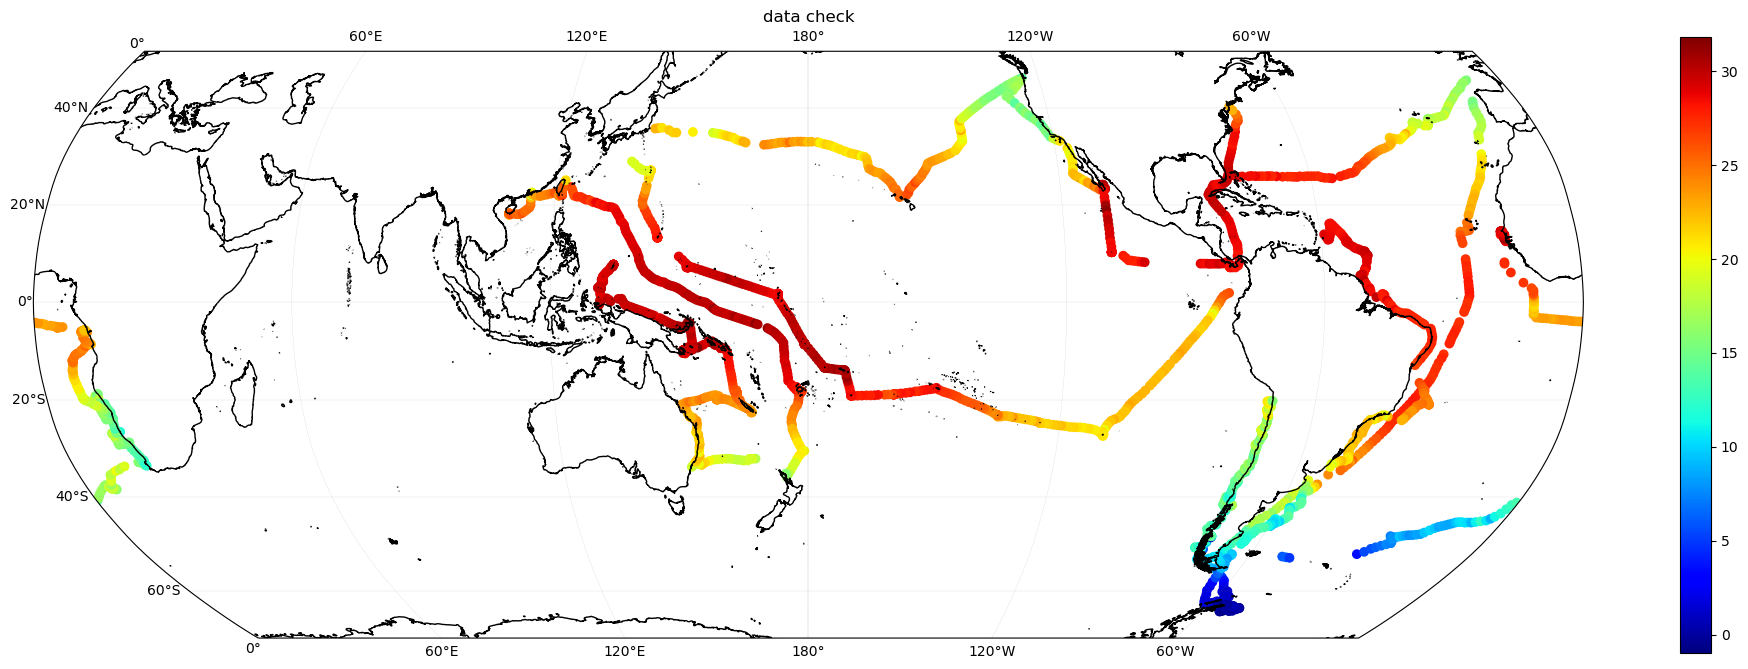

In [110]:
fig, ax = plt.subplots(figsize=(25,8), subplot_kw=dict(projection=crs.Robinson(central_longitude=180)))
ax.coastlines(resolution='10m')
gl = ax.gridlines(color='grey', linestyle='--', lw=0.1, draw_labels=True)

robinson = crs.Robinson(central_longitude=180).proj4_init
gdf[::300].to_crs(robinson).plot(ax=ax,column='t',legend=True, cmap='jet')

ax.set_title('data check')

# plt.savefig('chla_intermittency_map.png',dpi=300)

plt.show()

### now we can save this out and use it later

In [68]:
# gdf.to_csv('data/merged_tara_pacific_microbiome_acs.csv')

In [41]:
gdf['datetime'] = pd.to_datetime(gdf.dt)
gdf['utc_dt'] = gdf['datetime']
gdf  = gdf.set_index('utc_dt')

In [42]:
times = gdf.index.astype(int)

In [43]:
gdf['uid'] = times

In [44]:
# gdf[gdf.duplicated(keep=False)]

In [45]:
gdf.to_feather('data/merged_tara_pacific_microbiome_acs_160124.feather')

In [6]:
gdf.loc['2021-11-01' : '2022-10-15'].to_feather('data/merged_tara_horizon_subset.feather')

In [117]:
gdf = gpd.read_feather('data/merged_tara_pacific_microbiome_acs_160124.feather')

In [118]:
gdf['mission_id'] = 0
gdf.loc[gdf['datetime'] > '2020-01-01', 'mission_id'] = 1

In [119]:
def is_set(x, n):
    return x & 1 << n != 0

passes_flag = []
flag_bits = [8,9]

for i in gdf[gdf.mission_id==1].flag_bit:
    passed = True
    for bit in flag_bits:
        if is_set(i,bit):
            passed = False
    passes_flag.append(passed)
    
passes_flag = np.array(passes_flag)

In [61]:
64990/355940

0.18258695285722312

In [120]:
len(gdf[gdf.mission_id==1][passes_flag])

290950

In [63]:
len(passes_flag[passes_flag==False])

55089

### can just open it from the saved file now

In [ ]:
gdf = gpd.read_feather('data/merged_tara_pacific_microbiome_acs.feather')

In [5]:
len(gdf)

759418

In [ ]:
plt.plot(gdf.

(array([7.50921e+05, 3.76100e+03, 6.77000e+02, 2.91000e+02, 3.28000e+02,
        3.23000e+02, 9.30000e+01, 3.90000e+01, 5.00000e+00, 2.00000e+00]),
 array([7.50857143e-03, 2.48120676e+00, 4.95490495e+00, 7.42860314e+00,
        9.90230133e+00, 1.23759995e+01, 1.48496977e+01, 1.73233959e+01,
        1.97970941e+01, 2.22707923e+01, 2.47444905e+01]),
 <BarContainer object of 10 artists>)

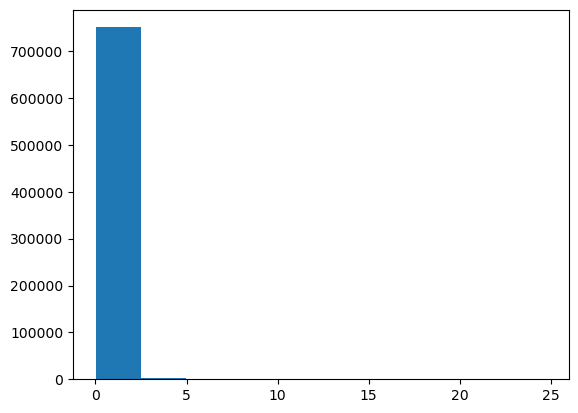

In [38]:
plt.hist(gdf['cp696.6'])

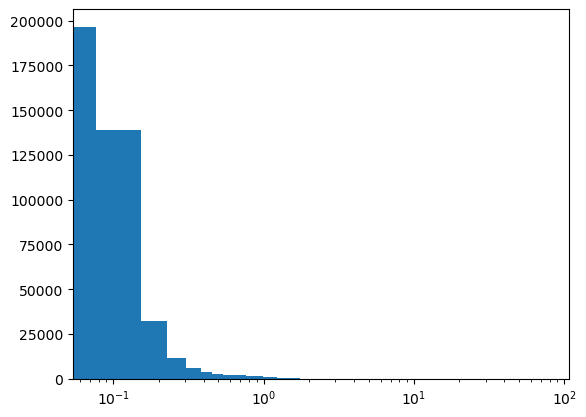

In [65]:
plt.hist(gdf.Chlb_agaus470.values/gdf.Chl_lineheight.values,bins=1000)
plt.xscale('log')
plt.show()